### NYC Tree Census Pre-processing + EDA

In [1]:
import requests
import pandas as pd 
import numpy as np
import os 

file_path = 'flatfiles/tree_census_15.csv'
if os.path.exists(file_path):
    tree_census_df = pd.read_csv(file_path)
else:
    tree_census_url = 'https://data.cityofnewyork.us/resource/5rq2-4hqu.json'
    d,i,offset_size = [],0,100000
    k = offset_size
    while k == offset_size:
        if i > 10:
            break
        r=requests.get(
            url = tree_census_url, 
            params={
                '$limit':offset_size, 
                '$offset':offset_size*i
            }
        )

        as_df = pd.DataFrame(r.json())
        k = len(as_df)
        i += 1
        d.append(as_df)

    tree_census_df = pd.concat(d)
    tree_census_df.to_csv(file_path)
    tree_census_df.head(10)


In [2]:
os.path.exists('tree_census/flatfiles/tree_features_final.csv')
os.path.abspath(os.getcwd())

'/Users/devenbarth/I2ADS-2024-group-project/tree_census'

In [3]:
tree_census_df.columns

Index(['Unnamed: 0', 'created_at', 'tree_id', 'block_id', 'the_geom',
       'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin',
       'spc_common', 'steward', 'guards', 'sidewalk', 'user_type', 'problems',
       'root_stone', 'root_grate', 'root_other', 'trnk_wire', 'trnk_light',
       'trnk_other', 'brnch_ligh', 'brnch_shoe', 'brnch_othe', 'address',
       'zipcode', 'zip_city', 'cb_num', 'borocode', 'boroname', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp'],
      dtype='object')

In [4]:
np.sort(tree_census_df['nta'].unique())

array(['BK09', 'BK17', 'BK19', 'BK21', 'BK23', 'BK25', 'BK26', 'BK27',
       'BK28', 'BK29', 'BK30', 'BK31', 'BK32', 'BK33', 'BK34', 'BK35',
       'BK37', 'BK38', 'BK40', 'BK41', 'BK42', 'BK43', 'BK44', 'BK45',
       'BK46', 'BK50', 'BK58', 'BK60', 'BK61', 'BK63', 'BK64', 'BK68',
       'BK69', 'BK72', 'BK73', 'BK75', 'BK76', 'BK77', 'BK78', 'BK79',
       'BK81', 'BK82', 'BK83', 'BK85', 'BK88', 'BK90', 'BK91', 'BK93',
       'BK95', 'BK96', 'BX01', 'BX03', 'BX05', 'BX06', 'BX07', 'BX08',
       'BX09', 'BX10', 'BX13', 'BX14', 'BX17', 'BX22', 'BX26', 'BX27',
       'BX28', 'BX29', 'BX30', 'BX31', 'BX33', 'BX34', 'BX35', 'BX36',
       'BX37', 'BX39', 'BX40', 'BX41', 'BX43', 'BX44', 'BX46', 'BX49',
       'BX52', 'BX55', 'BX59', 'BX62', 'BX63', 'BX75', 'MN01', 'MN03',
       'MN04', 'MN06', 'MN09', 'MN11', 'MN12', 'MN13', 'MN14', 'MN15',
       'MN17', 'MN19', 'MN20', 'MN21', 'MN22', 'MN23', 'MN24', 'MN25',
       'MN27', 'MN28', 'MN31', 'MN32', 'MN33', 'MN34', 'MN35', 'MN36',
      

In [5]:
#### only look at trees that are alive 
cols = [
    'tree_id','block_id','the_geom','zipcode','cb_num','borocode','nta_name',
    'health','status','tree_dbh','spc_common','spc_latin','problems','sidewalk',
]

tree_census_tr = tree_census_df[cols]
tree_census_tr = tree_census_tr.loc[tree_census_df['status']=='Alive']
tree_census_tr.loc[tree_census_tr.isna().any(axis=1)]

tree_census_tr = tree_census_tr.loc[~tree_census_tr['health'].isna()]
tree_census_tr['tree_dbh'] = tree_census_tr['tree_dbh'].astype(int)
tree_census_tr



,tree_id,block_id,the_geom,zipcode,cb_num,borocode,nta_name,health,status,tree_dbh,spc_common,spc_latin,problems,sidewalk
0,180683,348711,"{'type': 'Point', 'coordinates': [-73.84421521...",11375,406,4,Forest Hills,Fair,Alive,3,red maple,Acer rubrum,NaN,NoDamage
1,200540,315986,"{'type': 'Point', 'coordinates': [-73.81867945...",11357,407,4,Whitestone,Fair,Alive,21,pin oak,Quercus palustris,Stones,Damage
2,204026,218365,"{'type': 'Point', 'coordinates': [-73.93660770...",11211,301,3,East Williamsburg,Good,Alive,3,honeylocust,Gleditsia triacanthos var. inermis,NaN,Damage
3,204337,217969,"{'type': 'Point', 'coordinates': [-73.93445615...",11211,301,3,East Williamsburg,Good,Alive,10,honeylocust,Gleditsia triacanthos var. inermis,Stones,Damage
4,189565,223043,"{'type': 'Point', 'coordinates': [-73.97597938...",11215,306,3,Park Slope-Gowanus,Good,Alive,21,American linden,Tilia americana,Stones,Damage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,"{'type': 'Point', 'coordinates': [-73.95494401...",11211,301,3,North Side-South Side,Good,Alive,25,pin oak,Quercus palustris,NaN,Damage
683784,183795,348185,"{'type': 'Point', 'coordinates': [-73.85665019...",11375,406,4,Forest Hills,Good,Alive,7,Kentucky yellowwood,Cladrastis kentukea,NaN,NoDamage
683785,166161,401670,"{'type': 'Point', 'coordinates': [-74.13651724...",10314,501,5,Westerleigh,Good,Alive,12,red maple,Acer rubrum,NaN,Damage
683786,184028,504204,"{'type': 'Point', 'coordinates': [-73.90311472...",10457,205,2,Mount Hope,Good,Alive,9,red maple,Acer rubrum,NaN,NoDamage


In [6]:
tree_census_tr[['zipcode','cb_num']].drop_duplicates().sort_values(by=['cb_num']).head(10)

,zipcode,cb_num
24096,10013,101
92555,10006,101
73499,10282,101
66793,10281,101
262,10048,101
10526,10004,101
12626,10007,101
5789,10005,101
1441,10038,101
445,10280,101


In [7]:
import numpy as np

#make analysis at zipcode level...
zipcode_grp = tree_census_tr.groupby(['zipcode']).agg(
    tree_count=('tree_id', len), 
    tree_size=('tree_dbh', np.sum)
)

#avg tree size (diameter)
zipcode_grp['tree_size'] = zipcode_grp['tree_size']/zipcode_grp['tree_count']

#count trees per zip/health category (good, fair, bad), then pivot on the health cats
zipcode_grp_health_status = tree_census_tr.groupby(['zipcode','health'])[['tree_id']].count().reset_index()
zipcode_grp_health_status_piv = zipcode_grp_health_status.pivot(
    index='zipcode',
    columns='health', 
    values='tree_id'
)

#concat zip features
zipcode_grp_health_status_piv = zipcode_grp_health_status_piv.div(zipcode_grp['tree_count'], axis=0)
tree_zip_features = pd.concat((zipcode_grp_health_status_piv,zipcode_grp),axis=1)
tree_zip_features

/var/folders/wx/wz1pbs1903j_cfgqws400dz80000gn/T/ipykernel_73199/2345899268.py:4: FutureWarning: The provided callable <function sum at 0x107e1ab80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  zipcode_grp = tree_census_tr.groupby(['zipcode']).agg(


,Fair,Good,Poor,tree_count,tree_size
zipcode,,,,,
83,0.041845,0.949571,0.008584,932,16.505365
10001,0.117647,0.845882,0.036471,850,7.365882
10002,0.179333,0.767377,0.053290,2158,8.459222
10003,0.185795,0.761709,0.052496,1943,9.077200
10004,0.145299,0.829060,0.025641,117,6.658120
...,...,...,...,...,...
11691,0.234614,0.701417,0.063969,5362,8.813316
11692,0.280730,0.602254,0.117016,1863,4.962963
11693,0.284304,0.511352,0.204344,1013,7.897335


In [8]:
tree_census_df['spc_common'].value_counts()

spc_common
London planetree    87014
honeylocust         64264
Callery pear        58931
pin oak             53185
Norway maple        34189
                    ...  
black pine             37
pitch pine             33
Osage-orange           29
Scots pine             25
Virginia pine          10
Name: count, Length: 132, dtype: int64

In [9]:
import geopandas as gpd
import warnings 
warnings.filterwarnings('ignore')

#read zip geometry file
zips = gpd.read_file('flatfiles/ZIP_CODE_040114.shp')
zips.head(10)

#get population, area info per zip, to build per-capita feats wrto the tree data 
zips_tr = zips[[
    'ZIPCODE','POPULATION','AREA','geometry'
]]
zips_tr['ZIPCODE'] = zips_tr['ZIPCODE'].astype(np.int64)

#merge zip feats w tree feats
tree_zip_features = tree_zip_features.reset_index()
tree_zip_features_m = tree_zip_features.merge(
    zips_tr, 
    how='inner', 
    left_on='zipcode', 
    right_on='ZIPCODE', 
)

#build feats bridging zip attributes w tree quality/quantity (trees per unit area, trees per person, etc.)
tree_zip_features_m = tree_zip_features_m.set_index('zipcode')
tree_zip_features_m = tree_zip_features_m.loc[tree_zip_features_m['POPULATION']>0]
tree_zip_features_m['trees_per_ppl'] = tree_zip_features_m['tree_count']/tree_zip_features_m['POPULATION']
tree_zip_features_m['acres_ttl'] = tree_zip_features_m['AREA']/43560
tree_zip_features_m['tree_density (per acre)'] = tree_zip_features_m['tree_count']/tree_zip_features_m['acres_ttl']
tree_zip_features_m['Good'] = tree_zip_features_m['Good'].fillna(0.0)
tree_zip_features_m = tree_zip_features_m.rename(
    columns={
        'Good':'Tree Quality'
    }
)
#tree_zip_features_m['Poor'] = tree_zip_features_m['Poor'].fillna(0.0)
tree_zip_features_m = tree_zip_features_m.drop(
    columns=[
        'ZIPCODE','POPULATION',
    ]
)

#get important features
tree_features = [
    'Tree Quality', 'trees_per_ppl', 'tree_density (per acre)', 'geometry'
]
tree_zip_features_trunc = gpd.GeoDataFrame(tree_zip_features_m[tree_features])
tree_zip_features_trunc

DataSourceError: Unable to open flatfiles/ZIP_CODE_040114.shx or flatfiles/ZIP_CODE_040114.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [94]:
tree_zip_features_m['AREA']/43560

zipcode
83        879.269752
10001     408.515628
10002     603.308736
10003     356.712036
10004      91.885241
            ...     
11693      35.068851
11693     281.701481
11693      80.291914
11694    1104.260942
11697    1372.584036
Name: AREA, Length: 198, dtype: float64

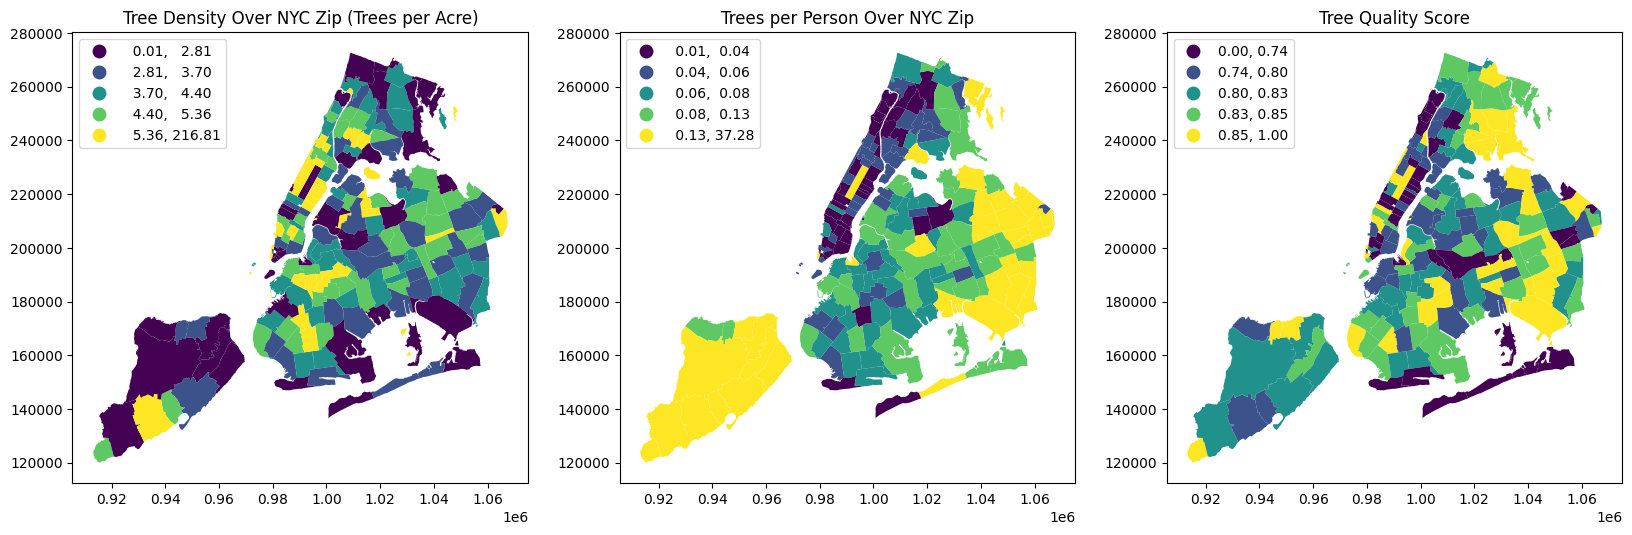

In [81]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3,figsize=(20,15),constrained_layout=False)
tree_zip_features_trunc.plot(
    column='tree_density (per acre)', 
    legend=True, 
    markersize=0.01,
    figsize=(10,10),
    scheme='Quantiles', 
    legend_kwds={'loc': 'upper left'},
    ax=ax[0]
)
ax[0].set_title('Tree Density Over NYC Zip (Trees per Acre)')
tree_zip_features_trunc.plot(
    column='trees_per_ppl', 
    legend=True, 
    markersize=0.01,
    figsize=(10,10),
    scheme='Quantiles', 
    legend_kwds={'loc': 'upper left'},
    ax=ax[1]
)
ax[1].set_title('Trees per Person Over NYC Zip')
tree_zip_features_trunc.plot(
    column='Tree Quality', 
    legend=True, 
    markersize=0.01,
    figsize=(10,10),
    scheme='Quantiles', 
    legend_kwds={'loc': 'upper left'},
    ax=ax[2]
)
ax[2].set_title('Tree Quality Score')
plt.savefig('treefeatures.png',)
plt.show()

In [91]:
tree_zip_features_trunc.to_csv('flatfiles/tree_features_final.csv')

In [92]:
tree_zip_features_trunc

,Tree Quality,trees_per_ppl,tree_density (per acre),geometry
zipcode,,,,
83,0.949571,37.280000,1.059971,"POLYGON ((998309.725 229616.681, 998282.853 22..."
10001,0.845882,0.037924,2.080704,"POLYGON ((981958.647 213464.453, 981980.328 21..."
10002,0.767377,0.026542,3.576941,"POLYGON ((991339.87 207576.784, 991330.49 2075..."
10003,0.761709,0.034772,5.446971,"POLYGON ((989830.469 207048.126, 989716.354 20..."
10004,0.829060,0.053498,1.273327,"POLYGON ((981197.409 196571.082, 981485.049 19..."
...,...,...,...,...
11693,0.511352,0.091658,28.886033,"POLYGON ((1030722.649 160980.77, 1030642.283 1..."
11693,0.511352,0.091658,3.596005,"POLYGON ((1036087.15 154632.639, 1036096.661 1..."
11693,0.511352,0.091658,12.616463,"POLYGON ((1028453.995 167153.41, 1027813.01 16..."


In [11]:
aq_url = 'https://data.cityofnewyork.us/resource/c3uy-2p5r.json'
params={'$limit':20000}
aq = pd.DataFrame(requests.get(aq_url, params = params).json(), )
aq.head(15)

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
0,827080,386,Ozone (O3),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Summer 2022,2022-06-01T00:00:00.000,33.3
1,827061,386,Ozone (O3),Mean,ppb,UHF34,405,Ridgewood - Forest Hills,Summer 2022,2022-06-01T00:00:00.000,34.2
2,827067,386,Ozone (O3),Mean,ppb,UHF34,302,Central Harlem - Morningside Heights,Summer 2022,2022-06-01T00:00:00.000,30.9
3,827081,386,Ozone (O3),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Summer 2022,2022-06-01T00:00:00.000,31.7
4,825967,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Summer 2022,2022-06-01T00:00:00.000,12.0
5,825985,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,502,Stapleton - St. George,Summer 2022,2022-06-01T00:00:00.000,8.7
6,827068,386,Ozone (O3),Mean,ppb,UHF34,301,Washington Heights,Summer 2022,2022-06-01T00:00:00.000,29.9
7,825976,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,101,Kingsbridge - Riverdale,Summer 2022,2022-06-01T00:00:00.000,10.6
8,825933,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Summer 2022,2022-06-01T00:00:00.000,10.9
9,827079,386,Ozone (O3),Mean,ppb,UHF34,201,Greenpoint,Summer 2022,2022-06-01T00:00:00.000,32.4


In [12]:
aq['geo_type_name'].unique()

array(['UHF34', 'UHF42', 'CD', 'Borough', 'Citywide'], dtype=object)

In [13]:
aq['name'].unique()

array(['Ozone (O3)', 'Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)',
       'Annual vehicle miles traveled (cars)',
       'Annual vehicle miles traveled (trucks)',
       'Annual vehicle miles traveled',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Asthma emergency department visits due to PM2.5',
       'Asthma emergency departments visits due to Ozone',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Cardiac and respiratory deaths due to Ozone',
       'Asthma hospitalizations due to Ozone', 'Deaths due to PM2.5',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Boiler Emissions- Total SO2 Emissions',
       'Boiler Emissions- Total NOx Emissions',
       'Outdoor Air Toxics - Formaldehyde',
       'Outdoor Air Toxics - Benzene'], dtype=object)

In [14]:
aq.loc[aq['geo_join_id']=='401'].head(10)

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
16,823397,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF34,401,Long Island City - Astoria,Summer 2022,2022-06-01T00:00:00.000,7.2
80,825712,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,401,Long Island City - Astoria,Summer 2022,2022-06-01T00:00:00.000,13.2
88,827115,386,Ozone (O3),Mean,ppb,UHF42,401,Long Island City - Astoria,Summer 2022,2022-06-01T00:00:00.000,32.9
125,827006,386,Ozone (O3),Mean,ppb,CD,401,Long Island City and Astoria (CD1),Summer 2022,2022-06-01T00:00:00.000,33.6
132,825897,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,401,Long Island City - Astoria,Summer 2022,2022-06-01T00:00:00.000,13.2
133,826351,375,Nitrogen dioxide (NO2),Mean,ppb,CD,401,Long Island City and Astoria (CD1),Summer 2022,2022-06-01T00:00:00.000,12.0
159,823241,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,401,Long Island City - Astoria,Summer 2022,2022-06-01T00:00:00.000,7.2
179,823528,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,401,Long Island City and Astoria (CD1),Summer 2022,2022-06-01T00:00:00.000,7.0
363,827064,386,Ozone (O3),Mean,ppb,UHF34,401,Long Island City - Astoria,Summer 2022,2022-06-01T00:00:00.000,32.9
431,823240,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,401,Long Island City - Astoria,Annual Average 2022,2022-01-01T00:00:00.000,6.4


In [15]:
tree_census_df.loc[tree_census_df['cb_num']==401]['nta_name'].unique()

array(['Steinway', 'Astoria', 'Old Astoria', 'Woodside',
       'Queensbridge-Ravenswood-Long Island City',
       'Hunters Point-Sunnyside-West Maspeth', 'Jackson Heights'],
      dtype=object)

In [16]:
cb_join = tree_census_df[['cb_num','nta_name']].drop_duplicates()
cb_join['cb_num'] = cb_join['cb_num'].astype(str)
aq_cd = aq.loc[aq['geo_type_name']=='CD']
aq_cd[['geo_join_id', 'geo_place_name', 'geo_type_name']].merge(
    cb_join, 
    how='inner', 
    left_on='geo_join_id',
    right_on='cb_num'
).head(5)

,geo_join_id,geo_place_name,geo_type_name,cb_num,nta_name
0,412,Jamaica and Hollis (CD12),CD,412,St. Albans
1,412,Jamaica and Hollis (CD12),CD,412,Jamaica
2,412,Jamaica and Hollis (CD12),CD,412,Hollis
3,412,Jamaica and Hollis (CD12),CD,412,Baisley Park
4,412,Jamaica and Hollis (CD12),CD,412,South Jamaica


### By Community Board/District 

Needed in order to join with the carbon emissions dataset


In [24]:
#make analysis at zipcode level...
cb_grp = tree_census_tr.groupby(['cb_num']).agg(
    tree_count=('tree_id', len), 
    tree_size=('tree_dbh', np.sum)
)

#avg tree size (diameter)
cb_grp['tree_size'] = cb_grp['tree_size']/cb_grp['tree_count']

#count trees per zip/health category (good, fair, bad), then pivot on the health cats
cb_grp_health_status = tree_census_tr.groupby(['cb_num','health'])[['tree_id']].count().reset_index()
cb_grp_health_status_piv = cb_grp_health_status.pivot(
    index='cb_num',
    columns='health', 
    values='tree_id'
)

#concat cb features
cb_grp_health_status_piv = cb_grp_health_status_piv.div(cb_grp['tree_count'], axis=0)
tree_cb_features = pd.concat((cb_grp_health_status_piv,cb_grp),axis=1)
tree_cb_features.head(10)

tree_cb_features['Good'] = tree_cb_features['Good'].fillna(0.0)
tree_cb_features = tree_cb_features.rename(
    columns={
        'Good':'Tree Quality'
    }
)

tree_cb_features = tree_cb_features.reset_index()
tree_cb_features['cb_num'] = tree_cb_features['cb_num'].astype(str)

#pre-process aq dataset before merging...
aq_parse = aq.loc[
    (aq['geo_type_name'] == 'CD')
   &(
       (aq['name'].str.contains('Outdoor Air Toxics')) 
     | (aq['name'].str.contains('Boiler Emissions')) 
     | (
         (aq['name'] == 'Nitrogen dioxide (NO2)') 
       & (aq['time_period'] == 'Annual Average 2022')
       )
   )
]
aq_parse['data_value'] = aq_parse['data_value'].astype(np.float64)

combined_aq_tree_census = aq_parse.merge(
    tree_cb_features, 
    how='inner', 
    left_on='geo_join_id',
    right_on='cb_num'
)

combined_aq_tree_census



,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,cb_num,Fair,Tree Quality,Poor,tree_count,tree_size
0,826349,375,Nitrogen dioxide (NO2),Mean,ppb,CD,318,Flatlands and Canarsie (CD18),Annual Average 2022,2022-01-01T00:00:00.000,13.3,318,0.141959,0.816994,0.041048,18442,15.426852
1,825842,375,Nitrogen dioxide (NO2),Mean,ppb,CD,103,Lower East Side and Chinatown (CD3),Annual Average 2022,2022-01-01T00:00:00.000,17.8,103,0.180293,0.764069,0.055638,4709,8.449352
2,826337,375,Nitrogen dioxide (NO2),Mean,ppb,CD,314,Flatbush and Midwood (CD14),Annual Average 2022,2022-01-01T00:00:00.000,14.7,314,0.146542,0.806324,0.047134,10120,13.931423
3,826331,375,Nitrogen dioxide (NO2),Mean,ppb,CD,312,Borough Park (CD12),Annual Average 2022,2022-01-01T00:00:00.000,15.2,312,0.136094,0.828087,0.035819,11977,12.864323
4,826002,375,Nitrogen dioxide (NO2),Mean,ppb,CD,202,Hunts Point and Longwood (CD2),Annual Average 2022,2022-01-01T00:00:00.000,18.1,202,0.130795,0.827946,0.041259,4702,7.340706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,227553,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,CD,403,Jackson Heights (CD3),2011,2011-01-01T00:00:00.000,2.3,403,0.147843,0.810373,0.041784,10315,12.319341
173,227530,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,CD,210,Throgs Neck and Co-op City (CD10),2011,2011-01-01T00:00:00.000,2.0,210,0.095958,0.877063,0.026979,10786,11.491100
174,227544,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,CD,312,Borough Park (CD12),2011,2011-01-01T00:00:00.000,2.0,312,0.136094,0.828087,0.035819,11977,12.864323
175,227562,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,CD,412,Jamaica and Hollis (CD12),2011,2011-01-01T00:00:00.000,1.8,412,0.098319,0.874420,0.027262,24980,13.073899


In [25]:
combined_aq_tree_census[['name','measure','measure_info','time_period']].drop_duplicates()

,name,measure,measure_info,time_period
0,Nitrogen dioxide (NO2),Mean,ppb,Annual Average 2022
59,Outdoor Air Toxics - Benzene,Annual average concentration,Âµg/m3,2011
61,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,2011


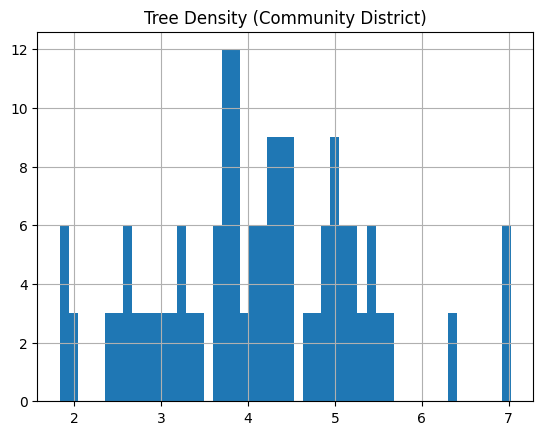

In [26]:
#read community board geojson, add geometries to aq/tree dataset
import matplotlib.pyplot as plt
cb_geometries = gpd.read_file("flatfiles/Community Districts.geojson")
combined_aq_tree_census_geoms = combined_aq_tree_census.merge(
    cb_geometries, 
    how='inner', 
    left_on='cb_num', 
    right_on='boro_cd'
)

#build tree density feature
combined_aq_tree_census_geoms.columns
combined_aq_tree_census_geoms['cb_acreage'] = \
combined_aq_tree_census_geoms['shape_area'].astype(np.float64)/43560
combined_aq_tree_census_geoms['Tree Density (per Acre)'] = \
combined_aq_tree_census_geoms['tree_count']/combined_aq_tree_census_geoms['cb_acreage']


combined_aq_tree_census_geoms['Tree Density (per Acre)'].hist(bins=50,)
plt.title('Tree Density (Community District)')
plt.show()



Run an analysis btw tree census features w/ pollution types (benzene, formaldehyde)

r[Tree Quality,Nitrogen dioxide (NO2)] = -0.26417078116686965
r[Tree Quality,Outdoor Air Toxics - Benzene] = -0.4583146765645917
r[Tree Quality,Outdoor Air Toxics - Formaldehyde] = -0.39795945934781846
r[Tree Density (per Acre),Nitrogen dioxide (NO2)] = 0.17466844185260824
r[Tree Density (per Acre),Outdoor Air Toxics - Benzene] = 0.18741307344091535
r[Tree Density (per Acre),Outdoor Air Toxics - Formaldehyde] = 0.27565519225509805


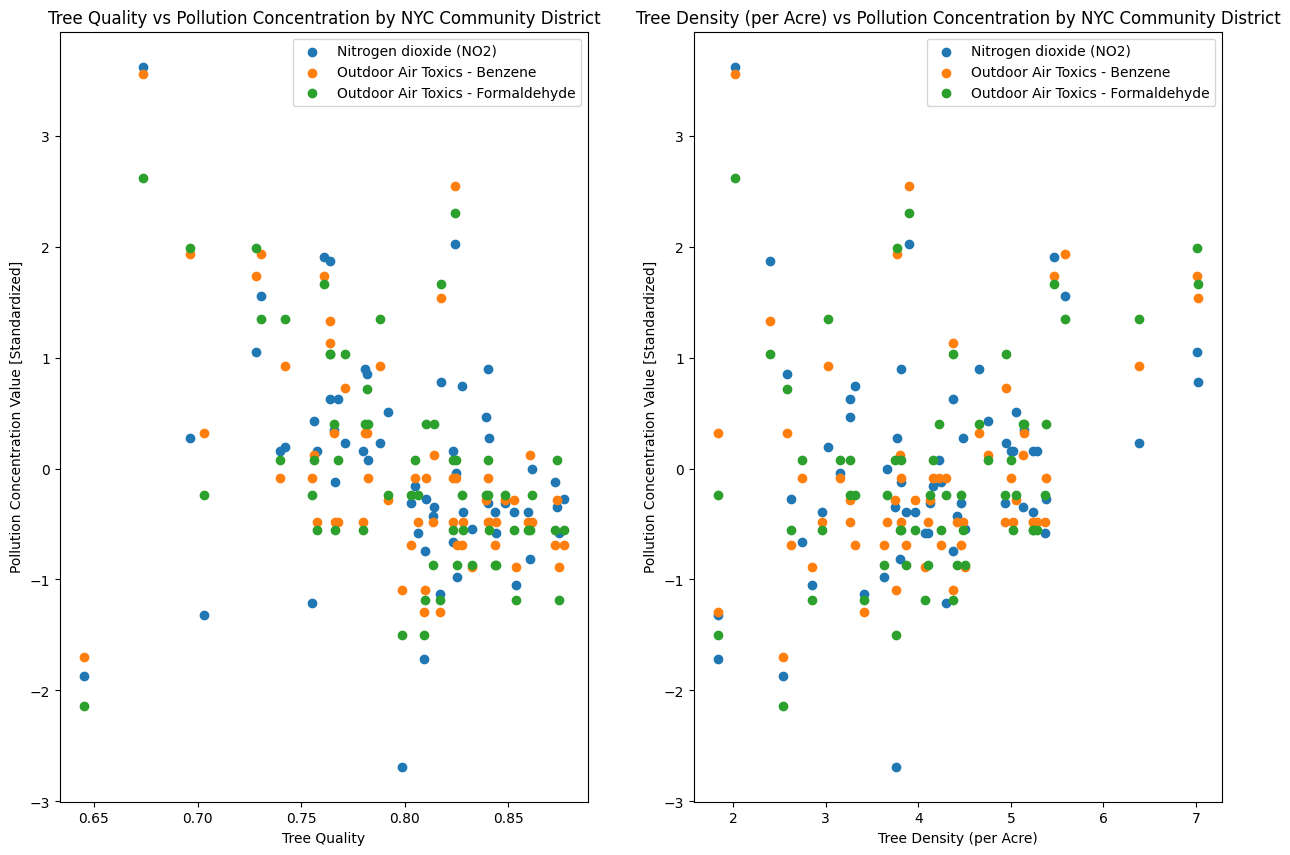

In [78]:
from scipy.stats import ks_1samp, norm


combined_trunc = combined_aq_tree_census_geoms[[
    'name','cb_num','Tree Quality','Tree Density (per Acre)', 'data_value', 'geometry'
]]
combined_trunc = combined_trunc.rename(
    columns={
        'name':'Pollution Category', 
        'data_value':'Pollution Concentration Value'
    }
)

features = [
    'Tree Quality', 'Tree Density (per Acre)'
]

fig,ax=plt.subplots(1,2,figsize=(15,10))
ax_feat_map = list(zip(ax, features))
for _ax, f in ax_feat_map:
   # norm_fit = ks_1samp(
    #    combined_trunc[f].drop_duplicates(), norm.cdf
  #  )
   # if norm_fit.pvalue < 0.05:
    #    print(f'Feature {f} not normally distributed')
    #else:
     #   print('Feature is potentially normally distributed')

    for p_type in combined_trunc['Pollution Category'].unique():
        d=combined_trunc.loc[combined_trunc['Pollution Category']==p_type]
        x = d[f]
        y = d['Pollution Concentration Value'] 
        y_std = (y - y.mean()) / y.std()
        corr = np.corrcoef(x,y)[0,1]
        print(f'r[{f},{p_type}] = {corr}')
        _ax.scatter(
            x=x, y=y_std,label=p_type
        )
    _ax.legend()
    _ax.set_xlabel(f)
    _ax.set_ylabel('Pollution Concentration Value [Standardized]')
    _ax.set_title(f'{f} vs Pollution Concentration by NYC Community District')
plt.show()

pollution_cat = combined_trunc.pivot(
    index='cb_num', 
    values='Pollution Concentration Value', 
    columns='Pollution Category'
)
combined_trunc = combined_trunc.drop(columns=['Pollution Category','Pollution Concentration Value'])
combined_trunc = combined_trunc.set_index('cb_num').drop_duplicates()
combined_trunc = pd.concat((pollution_cat, combined_trunc,),axis=1)
combined_trunc = gpd.GeoDataFrame(combined_trunc)
combined_trunc.head(10)

combined_trunc.to_csv('flatfiles/combined_tree_census_pollution.csv')



#fig_geo, ax_geo = plt.subplots(2,2,figsize=(20,15),constrained_layout=False)
#ax_feat_map_geo = list(zip(ax_geo, features))
#for _ax, f in ax_feat_map_geo: 
#pollution_cat
    
#combined_trunc.index.unique()


In [77]:
norm.cdf

<bound method rv_continuous.cdf of <scipy.stats._continuous_distns.norm_gen object at 0x2b7a7a7c0>>

In [36]:
combined_trunc.head()

,Nitrogen dioxide (NO2),Outdoor Air Toxics - Benzene,Outdoor Air Toxics - Formaldehyde,Tree Quality,Tree Density (per Acre),geometry
cb_num,,,,,,
101,21.0,2.3,2.5,0.764040,2.399876,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
102,20.2,2.6,2.6,0.730602,5.580675,"MULTIPOLYGON (((-74.00915 40.7425, -74.00902 4..."
103,17.8,2.2,2.5,0.764069,4.375522,"MULTIPOLYGON (((-73.98878 40.73397, -73.98757 ..."
104,21.4,2.9,2.9,0.824395,3.903700,"MULTIPOLYGON (((-73.99394 40.77318, -73.9937 4..."
105,25.5,3.4,3.0,0.673560,2.020331,"MULTIPOLYGON (((-73.97301 40.76428, -73.97141 ..."


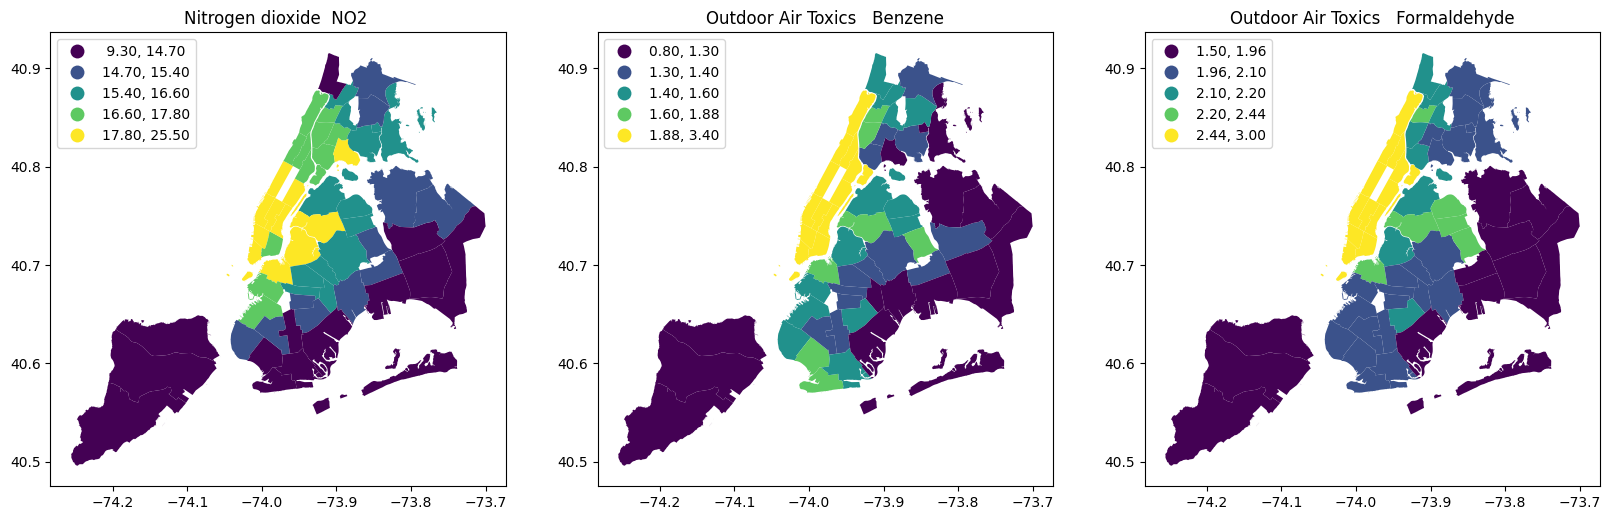

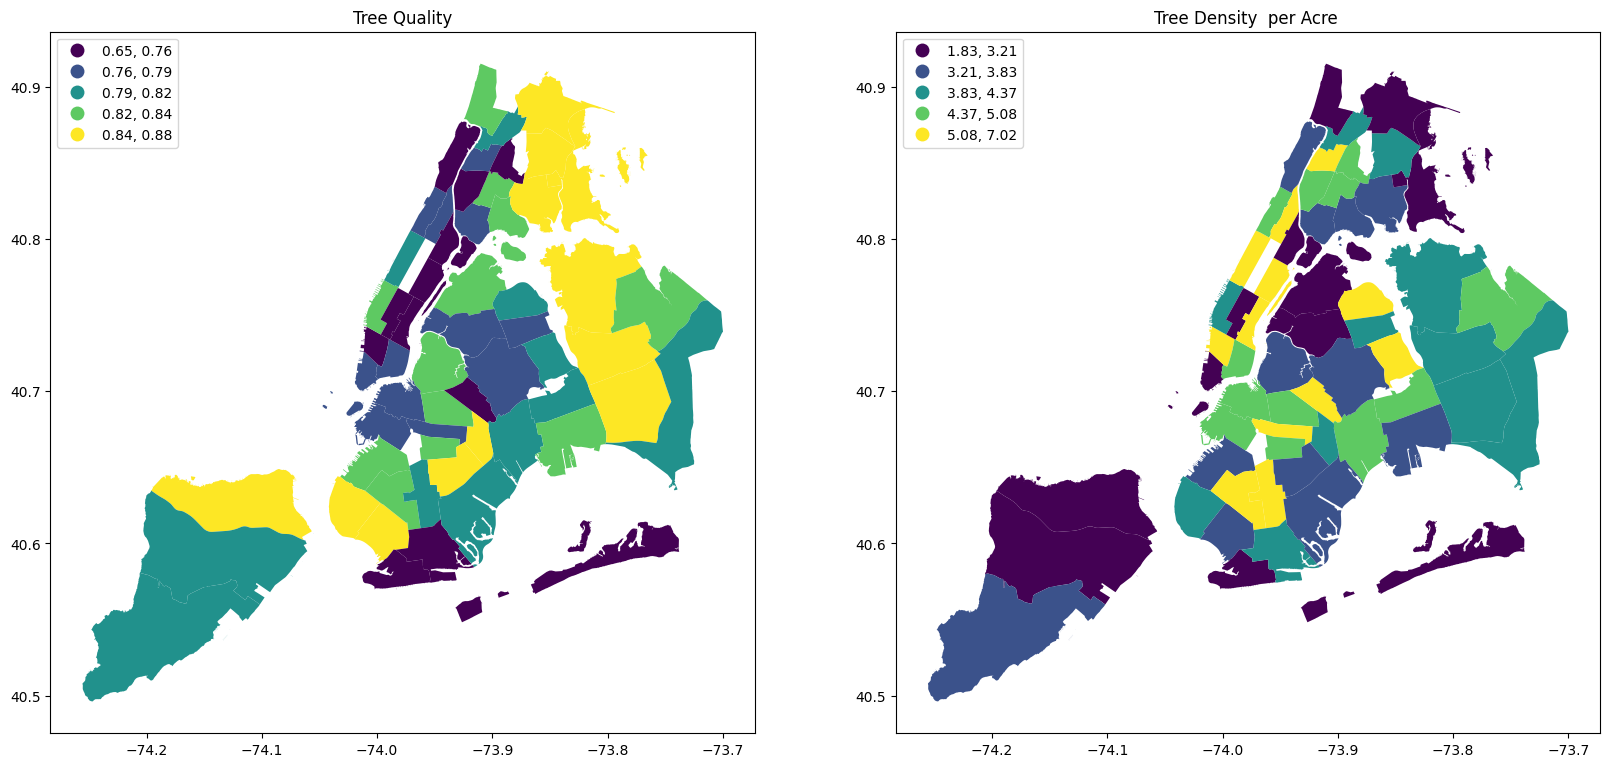

In [49]:
import re 

combined_trunc.columns = [re.sub(r'[^a-zA-Z0-9\s]', ' ', i).replace(" ",'_') for i in combined_trunc.columns]
targets = combined_trunc.columns[0:3]
predictors = combined_trunc.columns[3:5]

_, ax_targets=plt.subplots(1,3,figsize=(20,20))
for f,_ax in list(zip(targets,ax_targets)):
    combined_trunc.plot(
        column=f, 
        legend=True, 
        markersize=0.01,
        figsize=(10,10),
        scheme='Quantiles', 
        legend_kwds={'loc': 'upper left'},
        ax=_ax
    )
    title_clean = f.replace('_',' ')
    _ax.set_title(title_clean)

_, ax_predictors=plt.subplots(1,2,figsize=(20,20))
for f,_ax in list(zip(predictors,ax_predictors)):
    combined_trunc.plot(
        column=f, 
        legend=True, 
        markersize=0.01,
        figsize=(10,10),
        scheme='Quantiles', 
        legend_kwds={'loc': 'upper left'},
        ax=_ax
    )
    title_clean = f.replace('_',' ')
    _ax.set_title(title_clean)


In [67]:
import statsmodels.formula.api as smf

alpha,pv_df = 0.05,[]
for t in targets:
    formula = f"{t} ~ {'+'.join(predictors)}"
    lm = smf.ols(formula = formula, data = combined_trunc).fit() 
    pv=pd.DataFrame(lm.pvalues,columns=[t])
    pv_df.append(pv)

    print(f'R2 [TARGET: {t}]: {lm.rsquared}')
   
pv_df = pd.concat(pv_df,axis=1)
pv_df

R2 [TARGET: Nitrogen_dioxide__NO2_]: 0.10060431102743861
R2 [TARGET: Outdoor_Air_Toxics___Benzene]: 0.24575194266912181
R2 [TARGET: Outdoor_Air_Toxics___Formaldehyde]: 0.23509219993730524


,Nitrogen_dioxide__NO2_,Outdoor_Air_Toxics___Benzene,Outdoor_Air_Toxics___Formaldehyde
Intercept,0.000012,0.000002,2.772198e-08
Tree_Quality,0.041254,0.000218,1.200310e-03
Tree_Density__per_Acre_,0.171476,0.109127,2.125869e-02


In [68]:
pv_df < alpha

,Nitrogen_dioxide__NO2_,Outdoor_Air_Toxics___Benzene,Outdoor_Air_Toxics___Formaldehyde
Intercept,True,True,True
Tree_Quality,True,True,True
Tree_Density__per_Acre_,False,False,True
